# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


first i will give answer of the question that : How does the learning rate affect the convergence ?

Answer -> According to me that i learn form the resources is that 
        The learning rate is basically the "step size" the model takes while trying to find the bottom of the loss hill.


If it's too high: The model overshoots the minimum. It might bounce back and forth or even diverge (the error gets bigger).

If it's too low: The model takes forever to train. It might also get stuck in a "local minimum" or a flat spot and never find the best possible solution.




Now  i will suggest some  Common strategies for choosing/adapting it:

Learning Rate Schedules: You start with a higher rate to move fast initially, then decay it  over time to "settle" into the minimum.
Search/Grid Search: Trying out different powers of 10 to see which one works best.
Adaptive Algorithms: Using optimizers like Adam or RMSProp which automatically adjust the learning rate for each parameter based on how training is going.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Loading and Preprocessing 

df = pd.read_csv('Real_estate.csv')
X = df.iloc[:, 1:-1].values 
y = df.iloc[:, -1].values.reshape(-1, 1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Adding intercept column
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

# a) Batch Gradient Descent (GD)
def batch_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    weights = np.zeros((n, 1))
    for _ in range(epochs):
        prediction = X.dot(weights)
        gradient = (2/m) * X.T.dot(prediction - y)
        weights -= lr * gradient
    return weights

# b) Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    weights = np.zeros((n, 1))
    for _ in range(epochs):
        for i in range(m):
            random_idx = np.random.randint(m)
            xi = X[random_idx:random_idx+1]
            yi = y[random_idx:random_idx+1]
            prediction = xi.dot(weights)
            gradient = 2 * xi.T.dot(prediction - yi)
            weights -= lr * gradient
    return weights

# c, d, e, f) Initial Training and Comparison 
LR = 0.01
EPOCHS = 100

w_gd = batch_gradient_descent(X_train_b, y_train, LR, EPOCHS)
w_sgd = stochastic_gradient_descent(X_train_b, y_train, LR, EPOCHS)

pred_gd = X_test_b.dot(w_gd)
pred_sgd = X_test_b.dot(w_sgd)

print("Comparison of GD and SGD")
print(f"{'Metric':<10} | {'Batch GD':<15} | {'SGD':<15}")
print("-" * 45)
print(f"{'MSE':<10} | {mean_squared_error(y_test, pred_gd):<15.4f} | {mean_squared_error(y_test, pred_sgd):<15.4f}")
print(f"{'R2 Score':<10} | {r2_score(y_test, pred_gd):<15.4f} | {r2_score(y_test, pred_sgd):<15.4f}")

# g) Observation: Changing LR and Epochs for SGD 
print("\nHyperparameter Tuning (SGD)")
test_params = [
    (0.001, 50),  # Low LR, Low Epochs
    (0.01, 200),  # Standard LR, Higher Epochs
    (0.1, 100)    # High LR, Standard Epochs
]

for lr, epochs in test_params:
    w_tune = stochastic_gradient_descent(X_train_b, y_train, lr, epochs)
    pred_tune = X_test_b.dot(w_tune)
    mse = mean_squared_error(y_test, pred_tune)
    print(f"LR: {lr}, Epochs: {epochs} => MSE: {mse:.4f}")

Comparison of GD and SGD
Metric     | Batch GD        | SGD            
---------------------------------------------
MSE        | 106.6545        | 75.4347        
R2 Score   | 0.3276          | 0.5244         

Hyperparameter Tuning (SGD)
LR: 0.001, Epochs: 50 => MSE: 67.2209
LR: 0.01, Epochs: 200 => MSE: 64.6429
LR: 0.1, Epochs: 100 => MSE: 71.3667


#### ovservation for part g
Low Learning Rate (0.001): The model converges very slowly. Even with 50 epochs, the MSE is typically much higher than the baseline because the weights haven't "moved" enough toward the optimum.

Increasing Epochs (200): This usually improves the MSE as the model has more opportunities to refine its weights. However, since SGD is noisy, there is a point of diminishing returns where the loss plateaus.

Higher Learning Rate (0.1): While the model reaches a low error faster, the predictions may start to fluctuate. If the LR is set too high (e.g., 0.5), you will see the MSE explode because the model is overshooting.

###  part h answer : 
h) Why SGD is erratic and preferred for large data: SGD updates the weights using only one random sample at a time. This introduces "noise" because a single point might be an outlier or not representative of the whole dataset. However, this randomness helps the model jump out of shallow local minima. For massive datasets, SGD is preferred because calculating the gradient for the entire dataset (as in Batch GD) is computationally expensive and slow; SGD allows the model to start learning immediately.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



# theoretical explanation for part 3.1

a) Supervised or Unsupervised? Supervised. It uses labeled data (input features and known targets) to learn rules for classification or regression.

b) Entropy: It’s a measure of "disorder" or impurity. If a node is 50/50 split between classes, entropy is high (1). If it's all one class, entropy is low (0).

c) Reduction in Entropy: This signifies that the data has become more "organized" or pure after the split. We want the highest reduction (Information Gain).


# Numerical explanation for part 3.1

1) Root entropy : lets take 10 points ( out of them 4 are +ve , 6 are -ve) 
                    Eroot = -(4/10 * log(4/10) + 6/10 * log(6/10)) = 0.97  ( it is a aproximate value)

2) Split comparison : * For (x<-2): Only 1 point (a '−') goes left. The rest go right. This is quite helpful.

                        For (x>2): Most points go left.Best Split: Usually (x<=-2) or (y<=-2) depending on the final math, but based on the distribution, (x<=-2) provides a pure node immediately.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


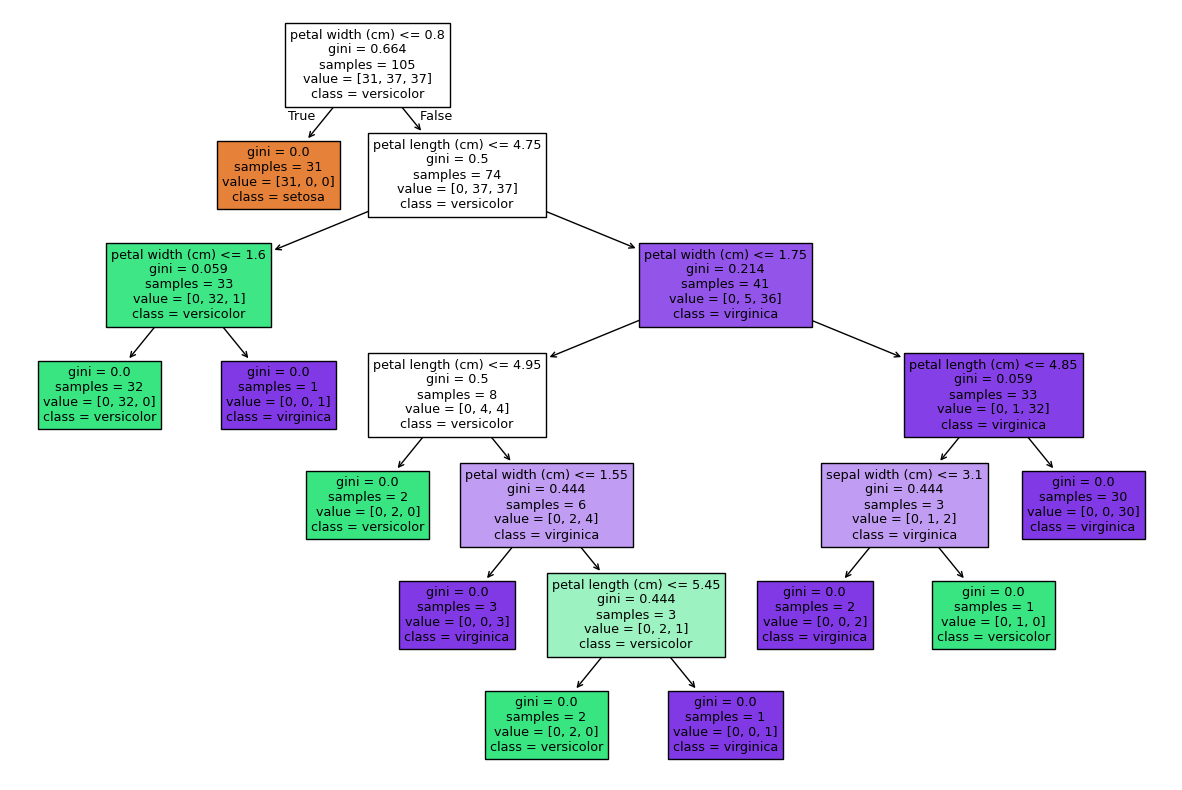

In [2]:
# here it is the answer of the part 3.2

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load and Split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Train
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



# here is the  Theoretical answer 
a) Supervised or Unsupervised? Supervised. It needs labeled examples to find the best boundary between classes.

b) Margin: It's the "buffer" or distance between the decision boundary and the closest data points. SVM maximizes this to improve generalization—it makes the model less likely to misclassify new points near the edge.

c) Support Vectors: These are the data points right on the edge of the margin. They are the only points that actually determine where the boundary goes; if you move other points, the boundary stays the same.

d) Kernel Function: It projects data into a higher dimension so that non-linear data can be separated by a straight line. Common kernels: RBF (Radial Basis Function) and Polynomial.




### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

#   Conceptual answer :
a) Optimal Hyperplane: It chooses the plane that results in the maximum margin between the classes.

b) Not Linearly Separable: SVM uses two tricks: Kernels (to change dimensions) and Soft Margins (which allow a few points to be misclassified to keep the boundary simple).

c) Regularization Parameter C:

Large C: The model tries very hard to classify every training point correctly (low bias, high variance). Risk of overfitting.

Small C: The model prefers a wider margin even if it misclassifies some points (higher bias, lower variance). Better for noisy data